<a href="https://colab.research.google.com/github/rizkaalawiyah/Titanic-Passengers-Anlysis/blob/main/EDA_Titanic_Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df = pd.read_csv("/content/titanic.csv", index_col="PassengerId")
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# @title Exploratory Data Analysis

#Target (Kolom Survived)
df.Survived.value_counts()



0    549
1    342
Name: Survived, dtype: int64

<ipython-input-6-f01d3ffa770a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color="r", label="not survived")
<ipython-input-6-f01d3ffa770a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 4

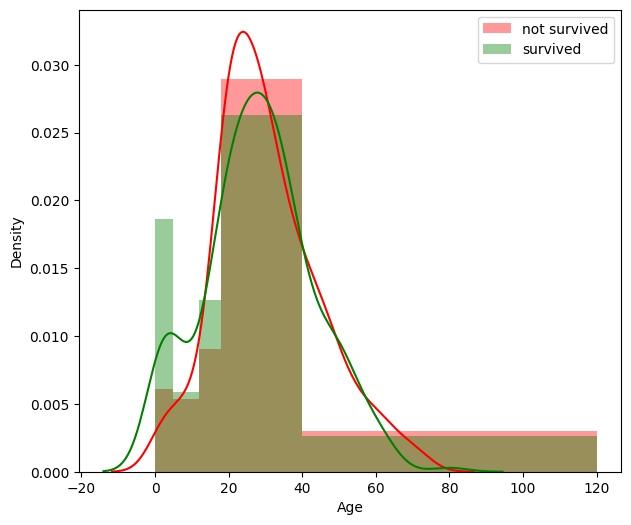

In [ ]:
#Numeric vs Target

plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.Survived == 0], bins=[0, 5, 12, 18, 40, 120], color="r", label="not survived")
sns.distplot(df.Age[df.Survived == 1], bins=[0, 5, 12, 18, 40, 120], color="g", label="survived")
plt.legend()

Kesimpulan: anak-anak balita sangat signifikan daripada orang dewasa, mereka cenderung selamat

<ipython-input-7-497f558823f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survived")
<ipython-input-7-497f558823f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survived")


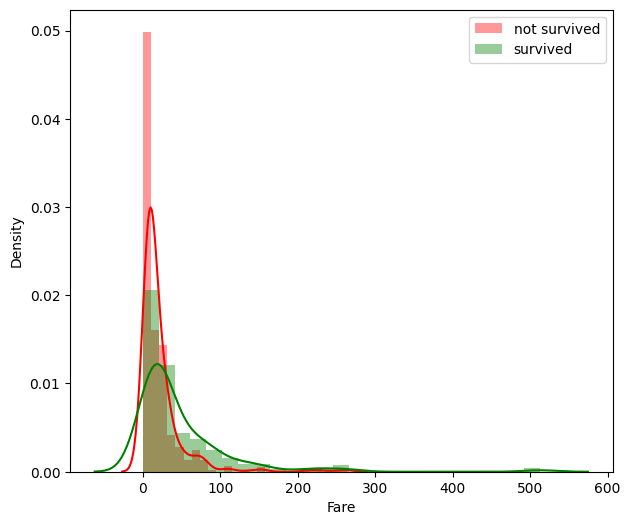

In [ ]:
plt.figure(figsize=(7, 6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="not survived")
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survived")
plt.legend()

kesimpulan: harga dibawah 25 dollar cenderung tidak selamat, sangat signifikan dengan harga diatas 25 dollar

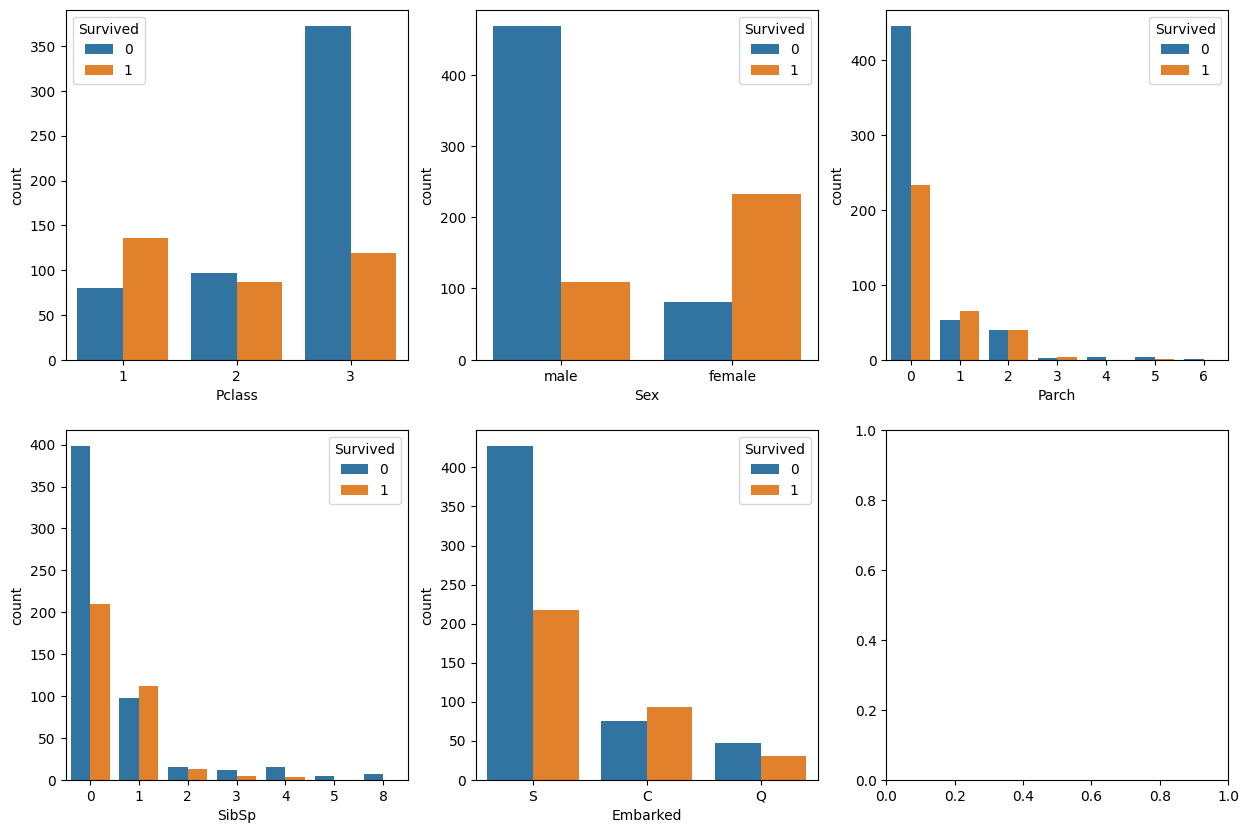

In [ ]:
# @title Categoric/Ordinal vs Target

cat_var = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(x= cat, data=df, hue="Survived", ax=ax)


kesimpulan:
Pclass = di kelas 3 (kelas yang lebih murah) ternyata cenderung tidak selamat
Gender = laki-laki cenderung tidak selamat dan perempuan cenderung selamat
Parch = dari plot diatas dapat dilihat cukup signifikan pada  penumpang yang tidak membawa anak ternyata cenderung tidak survived
SibSp = penumpang yang sendiri ternyata cenderung tidak selamat
Embarked = ternyata kota keberangkatan juga mempengaruhi keselamatan, dari data kota keberangkatan 'south' cenderung tidak selamat
